In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
    

In [32]:
 # load the data
import os
os.getcwd()


'C:\\Users\\oprea\\projects\\zero_to_deep_learning_video\\exercises'

In [33]:
df = pd.read_csv('../data/diabetes.csv')

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220E67D2EF0>,
      dtype=object)

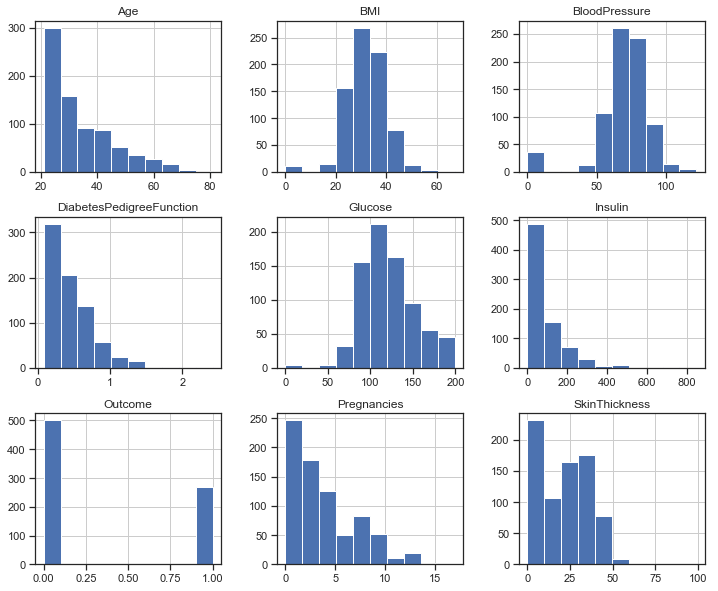

In [36]:
# histograms for each feature
df.hist(figsize=(12,10))

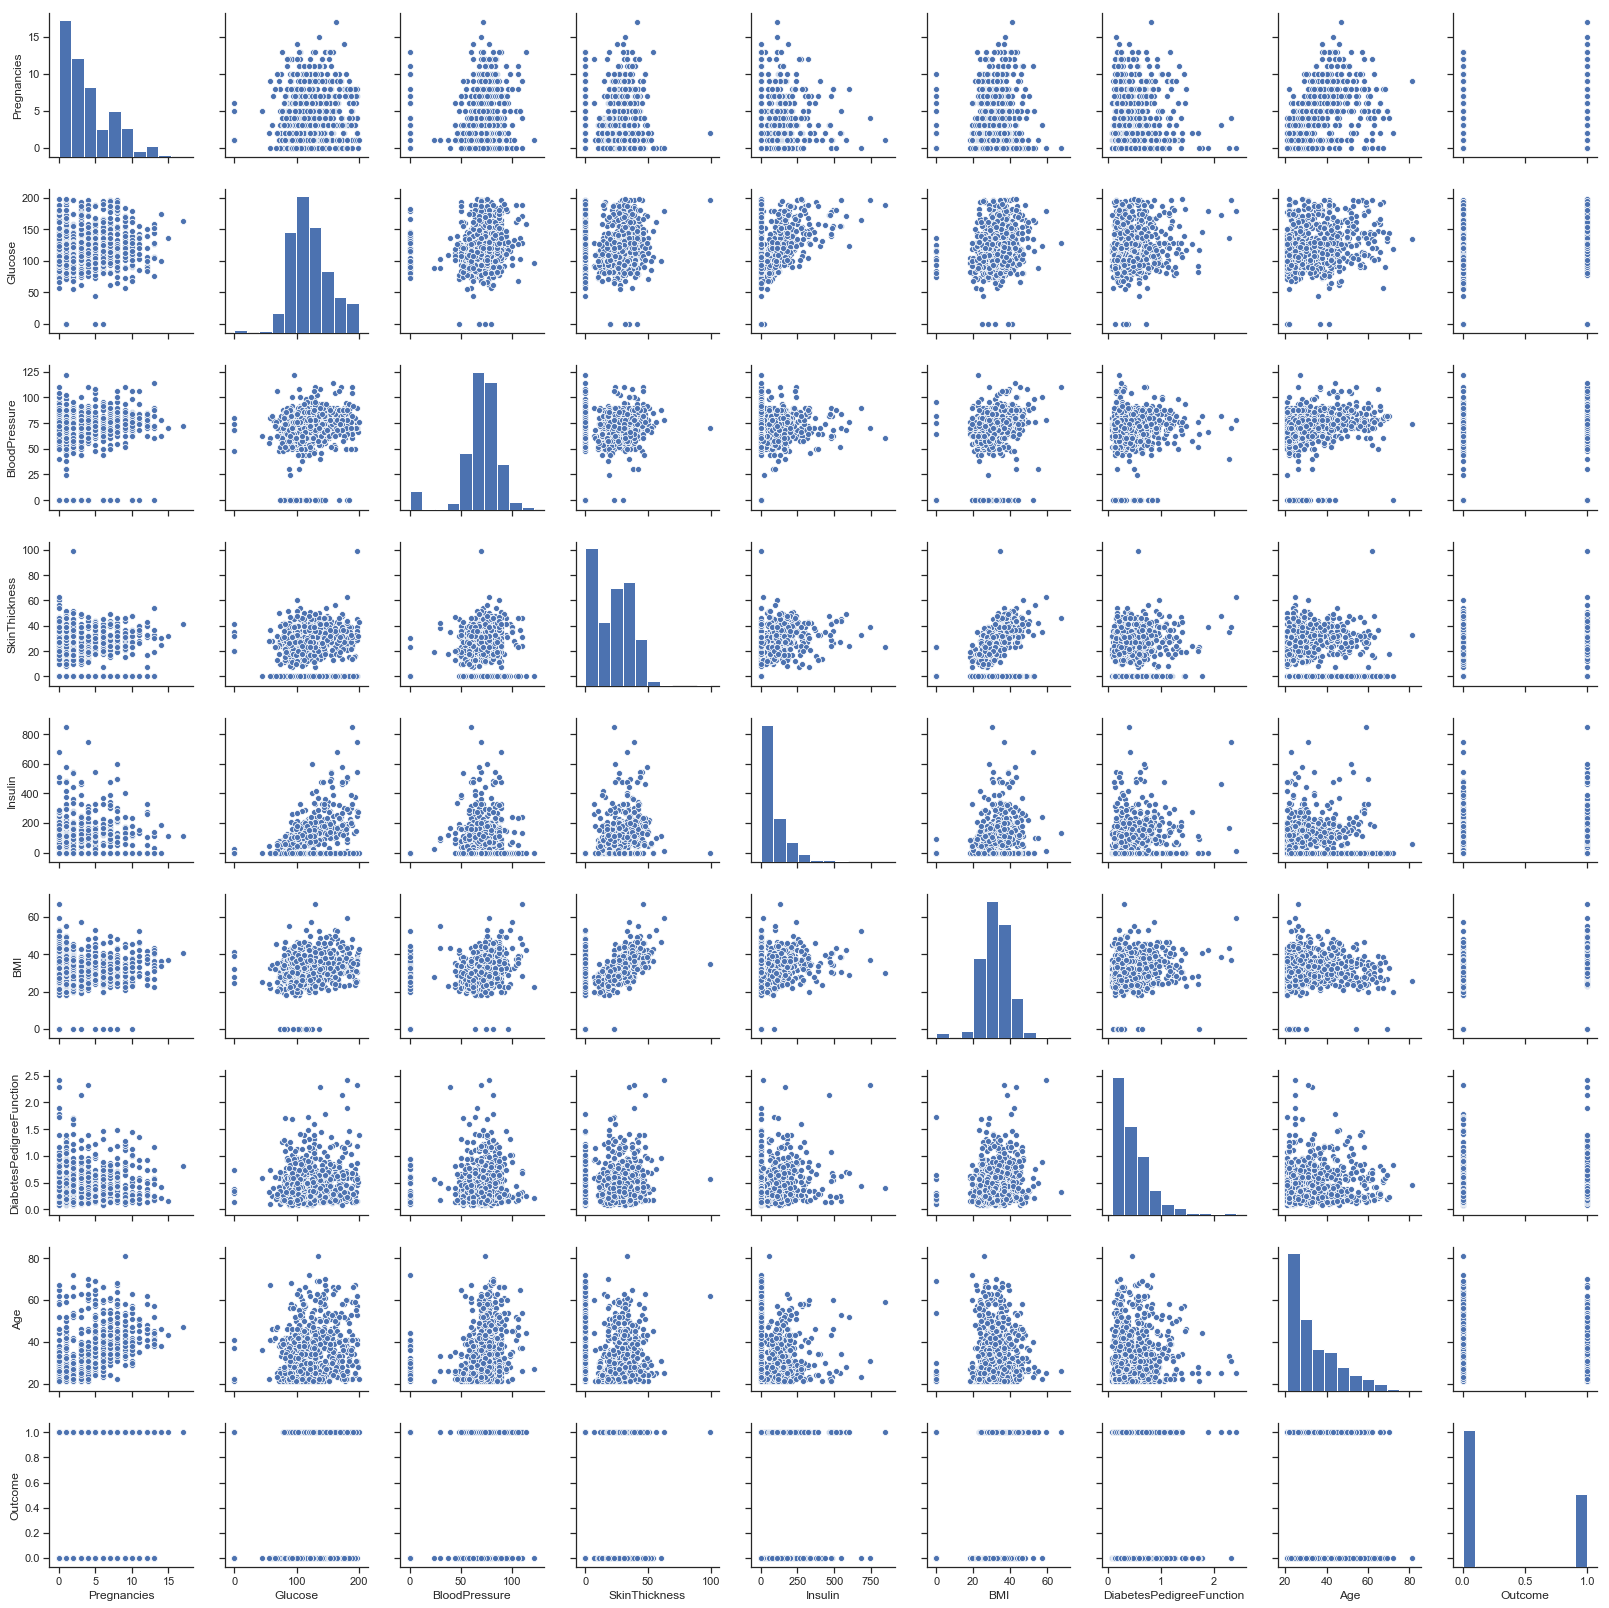

In [37]:
# explore correlations between features using seaborn
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

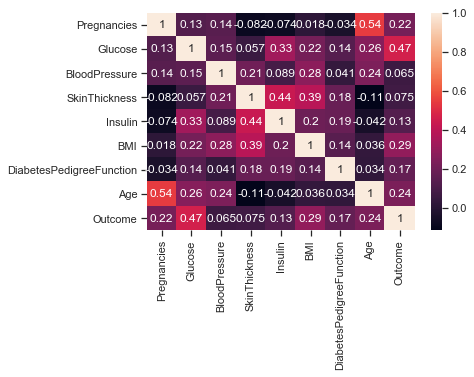

In [38]:
sns.heatmap(df.corr(), annot = True)

In [39]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df.drop('Outcome', axis=1))

C:\Users\oprea\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\oprea\Anaconda3\envs\ztdl\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
from keras.utils import to_categorical
y = df['Outcome'].values
y_cat = to_categorical(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    test_size=0.3,
                                                    random_state=42)

In [42]:
X.shape

(768, 8)

In [43]:
y_cat.shape

(768, 2)

In [44]:
type(X)

numpy.ndarray

In [45]:
X[:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [46]:
y_cat[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
# Exercise 2

In [58]:
X.shape

(768, 8)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    random_state=22,
                                                    test_size=0.2)

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [62]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(X_train,y_train,epochs=20, verbose=2, validation_split=0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/20
 - 0s - loss: 0.3365 - acc: 0.7754 - val_loss: 1.2484 - val_acc: 0.7742
Epoch 2/20
 - 0s - loss: 0.3053 - acc: 0.7971 - val_loss: 1.4356 - val_acc: 0.7742
Epoch 3/20
 - 0s - loss: 0.2911 - acc: 0.7935 - val_loss: 1.2573 - val_acc: 0.6452
Epoch 4/20
 - 0s - loss: 0.2877 - acc: 0.8134 - val_loss: 1.5343 - val_acc: 0.7742
Epoch 5/20
 - 0s - loss: 0.3165 - acc: 0.7989 - val_loss: 0.7328 - val_acc: 0.7903
Epoch 6/20
 - 0s - loss: 0.3318 - acc: 0.7953 - val_loss: 1.1130 - val_acc: 0.6935
Epoch 7/20
 - 0s - loss: 0.3184 - acc: 0.8170 - val_loss: 1.2516 - val_acc: 0.6774
Epoch 8/20
 - 0s - loss: 0.2944 - acc: 0.8225 - val_loss: 1.0862 - val_acc: 0.6613
Epoch 9/20
 - 0s - loss: 0.3220 - acc: 0.8152 - val_loss: 1.0438 - val_acc: 0.7903
Epoch 10/20
 - 0s - loss: 0.2860 - acc: 0.8134 - val_loss: 1.0819 - val_acc: 0.6290
Epoch 11/20
 - 0s - loss: 0.2707 - acc: 0.8116 - val_loss: 1.4307 - val_acc: 0.6774
Epoch 12/20
 - 0s - loss: 0.2989 - acc: 

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [78]:
accuracy_score(y_test_class, y_pred_class)

0.6883116883116883

In [79]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       100
           1       0.69      0.20      0.31        54

   micro avg       0.69      0.69      0.69       154
   macro avg       0.69      0.58      0.56       154
weighted avg       0.69      0.69      0.63       154



In [80]:
confusion_matrix(y_test_class, y_pred_class)

array([[95,  5],
       [43, 11]], dtype=int64)

In [81]:
# what is the benchmark?
pd.Series(y_test_class).value_counts() 

0    100
1     54
dtype: int64

In [83]:
pd.Series(y_test_class).value_counts() / len(y_test_class)

0    0.649351
1    0.350649
dtype: float64